# Assignment 4: Matplotlib
* Section: 02
* Name: Nate Yoon
* Due date: 3/2/21 @noon
* Purpose: To demonstrate our understanding of utilizing the Pandas and Matplotlib libraries.  

In [28]:
# Importing necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [29]:
# -- Reading a csv file, wage.csv, at http://barney.gonzaga.edu/~chuang/data --
# -- Naming dataframe as wage --
wage = pd.read_csv('http://barney.gonzaga.edu/~chuang/data/wage.csv')
wage

,FirstName,LastName,MiddleName,Sex,Title,Department,BaseRate,Hours
0,Guy,Gilbert,R,Male,Production Technician - WC60,Production,12.450,32
1,JoLynn,Dobney,M,Female,Production Supervisor - WC60,Production,25.000,33
2,Ruth,Ellerbrock,Ann,Male,Production Technician - WC10,Production,13.450,35
3,Barry,Johnson,K,Male,Production Technician - WC10,Production,13.450,40
4,Sidney,Higa,M,Male,Production Technician - WC10,Production,13.450,45
...,...,...,...,...,...,...,...,...
291,Ranjit,Varkey Chudukatil,R,Male,Sales Representative,Sales,23.077,37
292,Tete,Mensa-Annan,A,Female,Sales Representative,Sales,23.077,35
293,Syed,Abbas,E,Male,Pacific Sales Manager,Sales,48.101,35
294,Rachel,Valdez,B,Male,Sales Representative,Sales,23.077,35


## Assumption: The hours in the dataset are weekly working hours

## Preview and examine the dataset

In [30]:
# Printing the shape of the dataframe
# (# of rows, # of columns)
wage.shape

(296, 8)

In [31]:
# Printing column names in dataframe
wage.columns

Index(['FirstName', 'LastName', 'MiddleName', 'Sex', 'Title', 'Department',
       'BaseRate', 'Hours'],
      dtype='object')

## No groupby(), crosstab(), or pivot_table()

## Without using groupby(), crosstab() or pivot_table, find answers to the following questions:

In [16]:
# How many employees are in the Finance department?
# Showing only the Finance Department in DataFrame
wage[(wage['Department'] == 'Finance')]

,FirstName,LastName,MiddleName,Sex,Title,Department,BaseRate,Hours
201,Deborah,Poe,E,Male,Accounts Receivable Specialist,Finance,19.000,43
204,Wendy,Kahn,Beth,Female,Finance Manager,Finance,43.269,41
211,Candy,Spoon,L,Female,Accounts Receivable Specialist,Finance,19.000,45
215,David,Barber,M,Male,Assistant to the Chief Financial Officer,Finance,13.462,40
225,Bryan,Walton,A,Male,Accounts Receivable Specialist,Finance,19.000,35
227,David,Liu,J,Male,Accounts Manager,Finance,34.736,41
237,Dragan,Tomic,K,Male,Accounts Payable Specialist,Finance,19.000,30
240,Barbara,Moreland,C,Male,Accountant,Finance,26.442,44
246,Janet,Sheperdigian,L,Male,Accounts Payable Specialist,Finance,19.000,40
250,Mike,Seamans,K,Male,Accountant,Finance,26.442,34


In [17]:
# Outputting the number of Finance Departments in the DataFrame
wage[(wage['Department'] == 'Finance')]["Department"].count()

10

In [18]:
# What is the mean of working hours of employees in the Production department?  
wage[wage['Department'] == 'Production']['Hours'].mean()

37.787709497206706

In [19]:
# How many male employees are in the Sales department?
wage[(wage['Sex'] == 'Male') & (wage['Department'] == 'Sales')]

,FirstName,LastName,MiddleName,Sex,Title,Department,BaseRate,Hours
271,Stephen,Jiang,Y,Male,North American Sales Manager,Sales,48.101,35
276,Brian,Welcker,S,Male,Vice President of Sales,Sales,72.115,38
280,Michael,Blythe,G,Male,Sales Representative,Sales,23.077,45
281,Linda,Mitchell,C,Male,Sales Representative,Sales,23.077,43
283,Garrett,Vargas,R,Male,Sales Representative,Sales,23.077,35
284,Tsvi,Reiter,Michael,Male,Sales Representative,Sales,23.077,31
285,Pamela,Ansman-Wolfe,O,Male,Sales Representative,Sales,23.077,44
286,Shu,Ito,K,Male,Sales Representative,Sales,23.077,30
287,José,Saraiva,Edvaldo,Male,Sales Representative,Sales,23.077,36
288,David,Campbell,R,Male,Sales Representative,Sales,23.077,34


In [20]:
# Outputting the number of Male employees in the Sales Department in the DataFrame
wage[(wage['Department']=='Sales') & (wage['Sex']=='Male')]['FirstName'].count()

16

In [21]:
# What is the mean of weekly wages of female employees in the Marketing department?
# WeeklyWage = BaseRate * Hours
wage['WeeklyWage'] = wage['BaseRate']*wage['Hours']
wage[(wage['Department']=='Marketing') & (wage['Sex']=='Female')]['WeeklyWage'].mean()

496.7993333333334

## Groupby(), crosstab(), or pivot_table() allowed. Answer the following questions:  

In [22]:
# What are the totals of weekly wages of female and male employees?
wage.groupby('Sex')[['WeeklyWage']].sum()

,WeeklyWage
Sex,
Female,36652.192
Male,168600.804


In [23]:
# What are the numbers of male and female employees in the Marketing, Production, and Human Resources Departments? 
# Creating DataFrame with specific index values for Departments
dept_list = ('Marketikng', 'Production', 'Human Resources')
dept_sex = wage[(wage['Department'].isin(dept_list))]
# Creating cross-tab of result 
pd.crosstab(dept_sex['Department'], dept_sex['Sex'])

Sex,Female,Male
Department,,
Human Resources,3,3
Production,31,148


In [24]:
# What are the means of weekly wages of the Marketing, Production and Engineering departments?  
# WeeklyWage = BaseRate * Hours
wage['WeeklyWage'] = wage['BaseRate']*wage['Hours']
# Creating new list
dept_list2 = ('Marketikng', 'Production', 'Engineering')
dept_wage = wage[(wage['Department'].isin(dept_list))]
dept_wage.pivot_table('WeeklyWage', columns = 'Department', aggfunc = 'mean')

Department,Human Resources,Production
WeeklyWage,641.772,534.797486


In [25]:
# What are the totals of weekly age of male and female employees across departments using Pivot_table()?  
wage.pivot_table("WeeklyWage",index="Department", columns="Sex", aggfunc="sum")

Sex,Female,Male
Department,,
Document Control,NaN,2962.030
Engineering,2475.018,6777.369
Executive,NaN,9025.200
Facilities and Maintenance,693.750,2901.113
Finance,2629.029,6837.132
Human Resources,1909.796,1940.836
Information Services,1850.488,9536.135
Marketing,1490.398,4940.412
Production,16622.200,79106.550


## Matplotlib

Text(0, 0.5, 'Mean Weekly Wages')

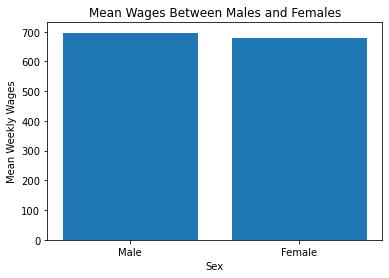

In [26]:
# How are mean wages different between males and females?  

#This determines the male and female mean wage
male_wage=wage[(wage['Sex'] == 'Male')]['WeeklyWage'].mean()
female_wage=wage[(wage['Sex'] == 'Female')]['WeeklyWage'].mean()


#An array is created to store the wages under their respective sex
array=[male_wage,female_wage]
sexes=['Male','Female']

#the chart is created from the declared arrays and labels are given
plt.bar(sexes,array)
plt.title('Mean Wages Between Males and Females')
plt.xlabel('Sex')
plt.ylabel('Mean Weekly Wages')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

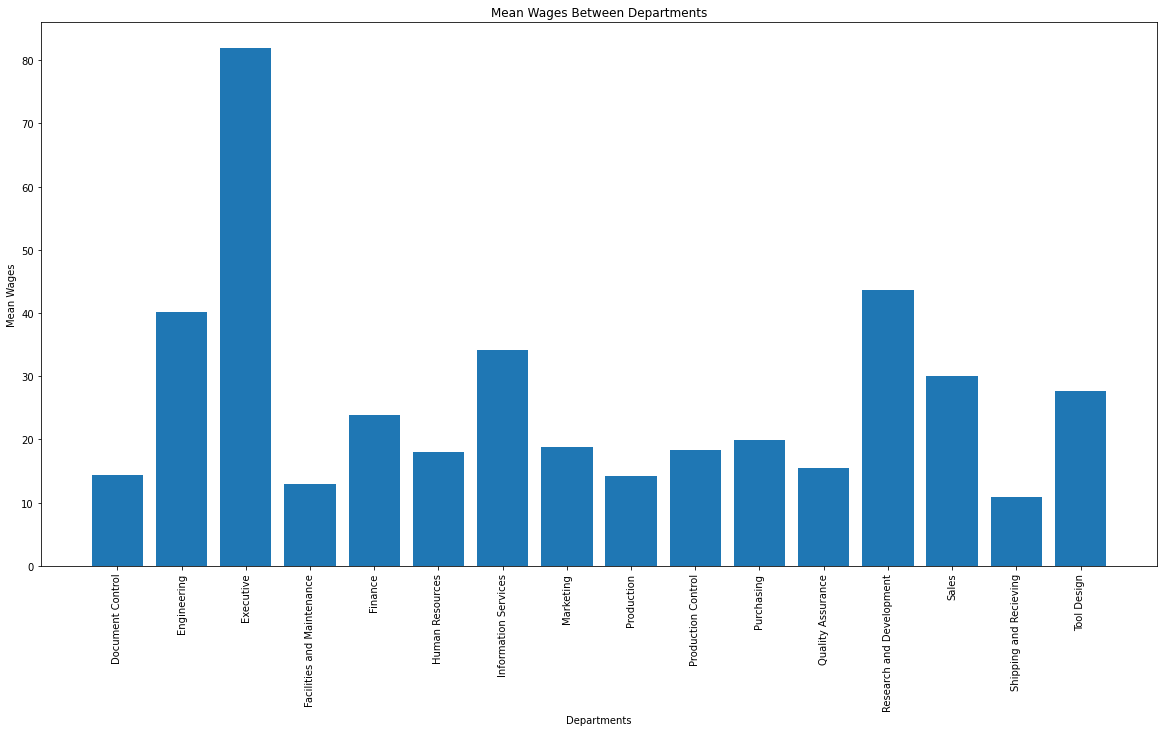

In [27]:
# How are mean wages different between departments?  
# The chart is formatted so it is more easily viewed
plt.figure(figsize=(20,10))
# A groupby is used to group the data by department and the mean function is called
wage2=wage.groupby('Department')['BaseRate'].mean()
# The departments are listed n an array so they can be displayed in the chart
departments = ['Document Control', 'Engineering', 'Executive', 'Facilities and Maintenance', 
               'Finance', 'Human Resources', 'Information Services', 'Marketing', 'Production', 
               'Production Control', 'Purchasing', 'Quality Assurance', 'Research and Development', 
               'Sales', 'Shipping and Recieving', 'Tool Design']
# A bar chart is created using the wage2 array and the array of department names
plt.bar(departments,wage2)
# Axis Labels
plt.xlabel('Departments')
plt.ylabel('Mean Wages')
plt.title('Mean Wages Between Departments')
# Rotates the x-axis labels 90 degrees
plt.xticks(rotation=90) 
